In [192]:

#installs
#!pip install xlrd
#!pip install uncertainties

In [193]:
#imports
import pandas as pd
import numpy as np
from uncertainties import unumpy as unp
from uncertainties import ufloat
from uncertainties.umath import *
import math
import scipy as sc
import matplotlib.pyplot as plt
from scipy import optimize
from numpy import arange
from numpy.ma.core import tan
from scipy.optimize import curve_fit
import csv
from scipy.signal import find_peaks

In [194]:
def daten_fitten(funct, x_data, y_data, genauigkeit, p, min, max): #Step4/5
    #fiten
    pars, cov = curve_fit(f=funct, xdata=x_data, ydata=y_data, p0=p, bounds=[-np.inf, np.inf], maxfev=500000)
    # Get the standard deviations of the parameters (square roots of the diagonal of the covariance)
    stdevs = np.sqrt(np.diag(cov))
    print('Fitparameter')
    print(pars)
    print('zugehörige Uncertainty')
    print(stdevs)
    #datensets
    xfit = np.linspace(min, max, genauigkeit)
    yfit = funct(xfit, *pars)
    return pars, stdevs, xfit, yfit

def daten_fitten_chi(funct, x_data, y_data, genauigkeit, p, min, max, y_errors=None): # Step 4/5
    # Fitten
    pars, cov = curve_fit(f=funct, xdata=x_data, ydata=y_data, p0=p, bounds=[-np.inf, np.inf], maxfev=500000)
    # Get the standard deviations of the parameters (square roots of the diagonal of the covariance)
    stdevs = np.sqrt(np.diag(cov))
    print('Fitparameter')
    print(pars)
    print('zugehörige Uncertainty')
    print(stdevs)

    # Berechnung der gefitteten y-Werte
    y_fit = funct(x_data, *pars)

    # Berechnung des Chi-Quadrat
    residuals = y_data - y_fit
    sigma_y = np.std(residuals)  # Standardabweichung der Residuen
    chi_sq = np.sum((residuals / sigma_y)**2)  # Chi-Quadrat
    print('Chi-Quadrat:')
    print(chi_sq)

    # Berechnung der Freiheitsgrade
    dof = len(x_data) - len(pars)

    # Berechnung des reduzierten Chi-Quadrat
    chi_sq_red = chi_sq / dof
    print('Reduziertes Chi-Quadrat:')
    print(chi_sq_red)

    # Datensets
    xfit = np.linspace(min, max, genauigkeit)
    yfit = funct(xfit, *pars)

    return pars, stdevs, xfit, yfit

def line(x, a, b):
  return a*x + b

In [185]:
def read_numbers_from_file(file_path):
    numbers = []
    time = []
    with open(file_path, 'r') as file:
        line_number = 0
        for line in file:
            line_number += 1
            if line_number <= 42000 or line_number > 89500:
                continue  # Skip the first line and the last two lines
            line = line.strip()
            zahlen = line.split(',')
            hintere_zahl = float(zahlen[1])
            numbers.append(hintere_zahl)
    return numbers

data = np.zeros((10, 47500))
for i in range(1,11):
  file_path = f"A1_{i}.CSV"
  numbers_array= read_numbers_from_file(file_path)
  numbers_array = np.array(numbers_array)
  data[i-1] = numbers_array


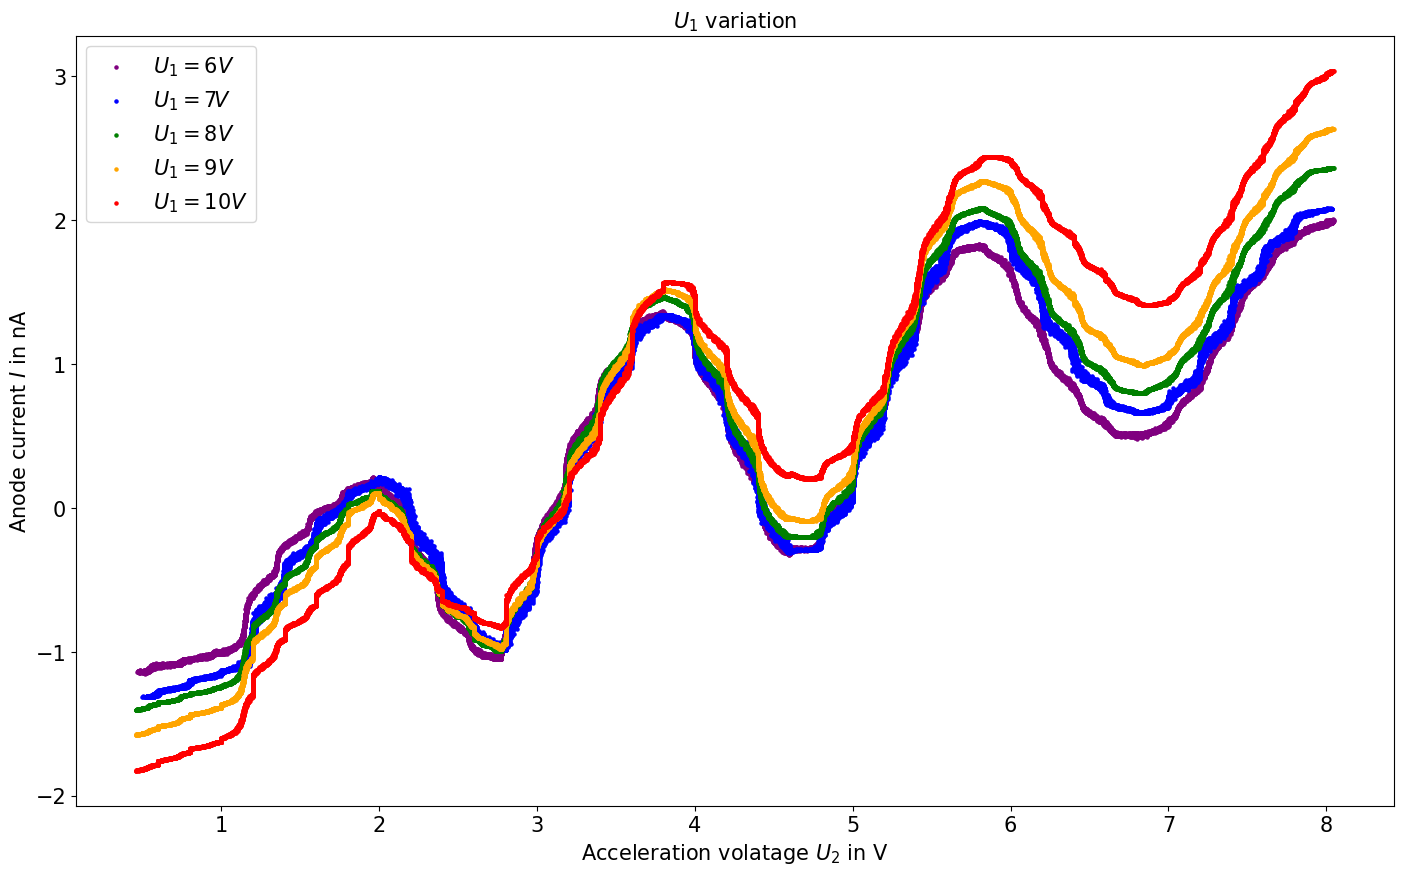

In [186]:
plt.subplots(1,1,figsize=(17, 10));

x = data[0]
y = data[1]

plt.scatter(x, y, color='purple', s=5, zorder= 5, label = r'$U_1 = 6V$')
peaks, _ = find_peaks(y,  distance=10000)
peaks = peaks[(x[peaks] >= 1) & (x[peaks] <= 7.5)]
#plt.scatter(x[peaks], y[peaks], color='black', s=100, zorder= 6, marker='x')

peakmax6 = peaks

peaks, _ = find_peaks(-y,  distance=10000)
peaks = peaks[(x[peaks] >= 1) & (x[peaks] <= 7.5)]
#plt.scatter(x[peaks], y[peaks], color='black', s=100, zorder= 6, marker='x')


peakmin6 = peaks

x = data[2]
y = data[3]

plt.scatter(x, y, color='blue', s=5, zorder= 5, label = r'$U_1 = 7V$')
peaks, _ = find_peaks(y,  distance=10000)
peaks = peaks[(x[peaks] >= 1) & (x[peaks] <= 7.5)]
#plt.scatter(x[peaks], y[peaks], color='black', s=100, zorder= 6, marker='x')


peakmax7 = peaks

peaks, _ = find_peaks(-y,  distance=10000)
peaks = peaks[(x[peaks] >= 1) & (x[peaks] <= 7.5)]
#plt.scatter(x[peaks], y[peaks], color='black', s=100, zorder= 6, marker='x')


peakmin7 = peaks

x = data[4]
y = data[5]

plt.scatter(x, y, color='green', s=5, zorder= 5, label = r'$U_1 = 8V$')
peaks, _ = find_peaks(y,  distance=10000)
peaks = peaks[(x[peaks] >= 1) & (x[peaks] <= 7.5)]
#plt.scatter(x[peaks], y[peaks], color='black', s=100, zorder= 6, marker='x')


peakmax8 = peaks

peaks, _ = find_peaks(-y,  distance=10000)
peaks = peaks[(x[peaks] >= 1) & (x[peaks] <= 7.5)]
#plt.scatter(x[peaks], y[peaks], color='black', s=100, zorder= 6, marker='x')


peakmin8 = peaks

x = data[6]
y = data[7]

plt.scatter(x, y, color='orange', s=5, zorder= 5, label = r'$U_1 = 9V$')
peaks, _ = find_peaks(y,  distance=10000)
peaks = peaks[(x[peaks] >= 1) & (x[peaks] <= 7.5)]
#plt.scatter(x[peaks], y[peaks], color='black', s=100, zorder= 6, marker='x')


peakmax9 = peaks

peaks, _ = find_peaks(-y,  distance=10000)
peaks = peaks[(x[peaks] >= 1) & (x[peaks] <= 7.5)]
#plt.scatter(x[peaks], y[peaks], color='black', s=100, zorder= 6, marker='x')


peakmin9 = peaks

x = data[8]
y = data[9]

plt.scatter(x, y, color='red', s=5, zorder= 5, label = r'$U_1 = 10V$')
peaks, _ = find_peaks(y,  distance=10000)
peaks = peaks[(x[peaks] >= 1) & (x[peaks] <= 7.5)]
#plt.scatter(x[peaks], y[peaks], color='black', s=100, zorder= 6, marker='x')

peakmax10 = peaks

peaks, _ = find_peaks(-y,  distance=10000)
peaks = peaks[(x[peaks] >= 1) & (x[peaks] <= 7.5)]
#plt.scatter(x[peaks], y[peaks], color='black', s=100, zorder= 6, marker='x')

peakmin10 = peaks


#pars, stdevs, xfit, yfit = daten_fitten(exponential, x_array, y_array, 100, [200, -0.02], 0 ,310)
#plt.plot(xfit, yfit, '--', color='red', label = r'Exponential-Fit:$ y = (%.0f \pm %.0f) \cdot exp({(%.4f \pm %.4f) \frac{1}{ms} \cdot x})$'%(pars[0], stdevs[0], pars[1], stdevs[1]), zorder= 6, linewidth=3)

plt.xlabel(r'Acceleration volatage $U_2$ in V', fontsize=15)
plt.ylabel(r'Anode current $I$ in nA', fontsize=15)
plt.title(r'$U_1$ variation', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Display the plot
plt.legend(loc = 'upper left', fontsize=15)
#plt.axis([0, 310, 0.1, 500]) #Achsenanpassung
plt.show()

Fitparameter
[ 0.3240613  -0.95599056]
zugehörige Uncertainty
[0.00117901 0.0056508 ]
Chi-Quadrat:
47500.0
Reduziertes Chi-Quadrat:
1.0000421070360856
Fitparameter
[ 0.36318847 -1.09298633]
zugehörige Uncertainty
[0.00119348 0.00574486]
Chi-Quadrat:
47499.999999999985
Reduziertes Chi-Quadrat:
1.0000421070360854
Fitparameter
[ 0.4091597  -1.23033719]
zugehörige Uncertainty
[0.0011967  0.00573427]
Chi-Quadrat:
47500.0
Reduziertes Chi-Quadrat:
1.0000421070360856
Fitparameter
[ 0.46449869 -1.40496776]
zugehörige Uncertainty
[0.00120112 0.00575599]
Chi-Quadrat:
47500.00000000001
Reduziertes Chi-Quadrat:
1.0000421070360859
Fitparameter
[ 0.55608877 -1.70215221]
zugehörige Uncertainty
[0.001091   0.00522878]
Chi-Quadrat:
47500.00000000001
Reduziertes Chi-Quadrat:
1.0000421070360859


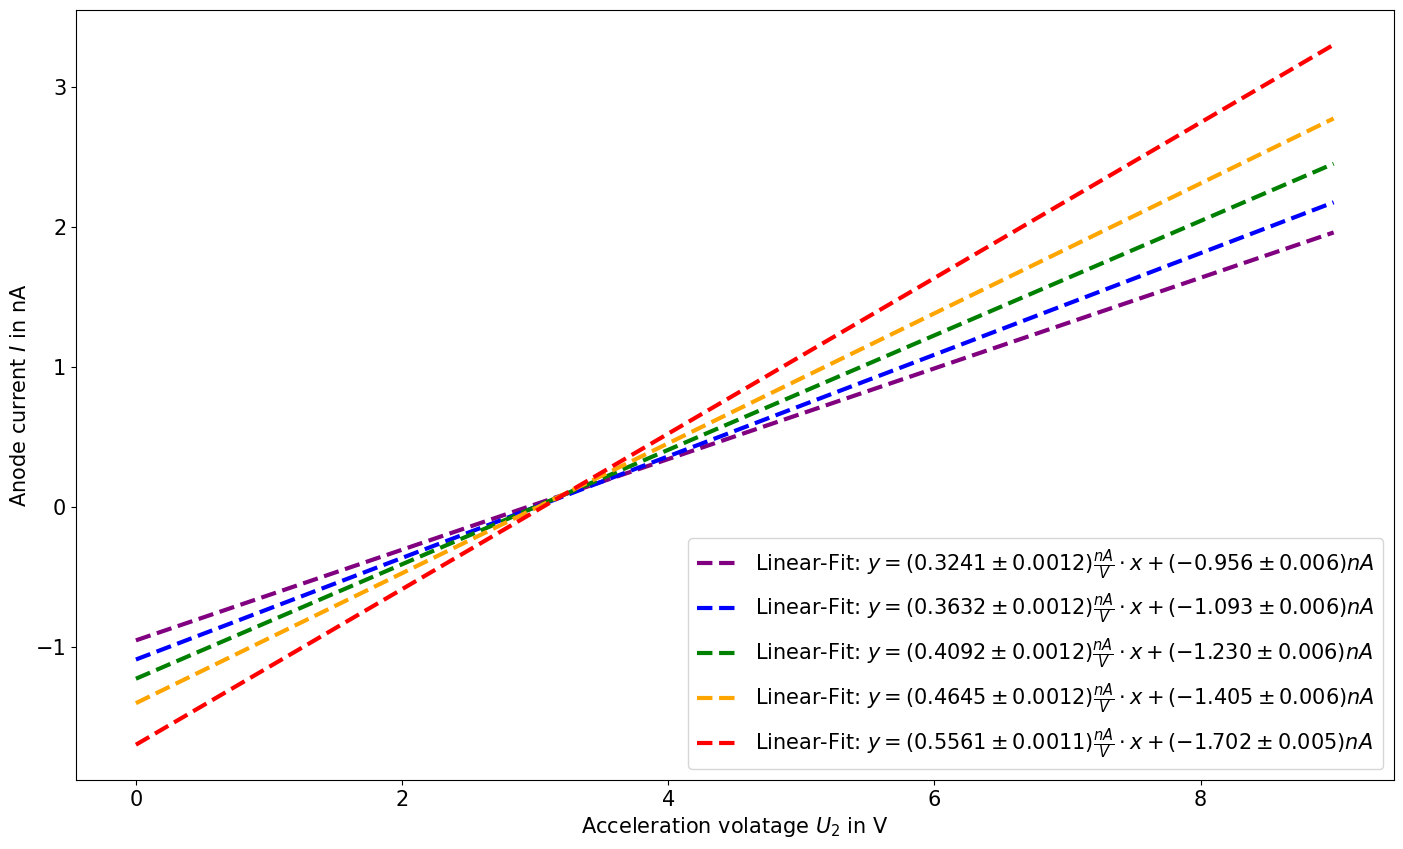

In [187]:
plt.subplots(1,1,figsize=(17, 10));
x = data[0]
y = data[1]
pars, stdevs, xfit, yfit = daten_fitten_chi(line, x, y, 10000, [1, 1], 0, 9)
plt.plot(xfit, yfit, '--', color='purple', label = r'Linear-Fit: $ y = (%.4f \pm %.4f) \frac{nA}{V} \cdot x + (%.3f \pm %.3f) nA$'%(pars[0], stdevs[0], pars[1], stdevs[1]), zorder= 4, linewidth=3)

x = data[2]
y = data[3]
pars, stdevs, xfit, yfit = daten_fitten_chi(line, x, y, 10000, [1, 1], 0, 9)
plt.plot(xfit, yfit, '--', color='blue', label = r'Linear-Fit: $ y = (%.4f \pm %.4f) \frac{nA}{V} \cdot x + (%.3f \pm %.3f) nA$'%(pars[0], stdevs[0], pars[1], stdevs[1]), zorder= 4, linewidth=3)

x = data[4]
y = data[5]
pars, stdevs, xfit, yfit = daten_fitten_chi(line, x, y, 10000, [1, 1], 0, 9)
plt.plot(xfit, yfit, '--', color='green', label = r'Linear-Fit: $ y = (%.4f \pm %.4f) \frac{nA}{V} \cdot x + (%.3f \pm %.3f) nA$'%(pars[0], stdevs[0], pars[1], stdevs[1]), zorder= 4, linewidth=3)

x = data[6]
y = data[7]
pars, stdevs, xfit, yfit = daten_fitten_chi(line, x, y, 10000, [1, 1], 0, 9)
plt.plot(xfit, yfit, '--', color='orange', label = r'Linear-Fit: $ y = (%.4f \pm %.4f) \frac{nA}{V} \cdot x + (%.3f \pm %.3f) nA$'%(pars[0], stdevs[0], pars[1], stdevs[1]), zorder= 4, linewidth=3)

x = data[8]
y = data[9]
pars, stdevs, xfit, yfit = daten_fitten_chi(line, x, y, 10000, [1, 1], 0, 9)
plt.plot(xfit, yfit, '--', color='red', label = r'Linear-Fit: $ y = (%.4f \pm %.4f) \frac{nA}{V} \cdot x + (%.3f \pm %.3f) nA$'%(pars[0], stdevs[0], pars[1], stdevs[1]), zorder= 4, linewidth=3)

plt.xlabel(r'Acceleration volatage $U_2$ in V', fontsize=15)
plt.ylabel(r'Anode current $I$ in nA', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Display the plot
plt.legend(loc = 'lower right', fontsize=15)
#plt.axis([0, 310, 0.1, 500]) #Achsenanpassung
plt.show()

In [188]:
data2 = np.zeros((10, 47500))
for i in range(1,11):
  file_path = f"A2_{i}.CSV"
  numbers_array= read_numbers_from_file(file_path)
  numbers_array = np.array(numbers_array)
  data2[i-1] = numbers_array

Fitparameter
[-6.64777641  1.98446083 -0.50427609]
zugehörige Uncertainty
[0.02880182 0.00028856 0.00086023]
Chi-Quadrat:
3377.0
Reduziertes Chi-Quadrat:
1.0008891523414345
Fitparameter
[ 5.89477041  2.52399442 -1.30509008]
zugehörige Uncertainty
[0.04425008 0.00062937 0.00134037]
Chi-Quadrat:
3426.0
Reduziertes Chi-Quadrat:
1.0008764241893076
Fitparameter
[-8.23382832  3.80034048  1.77660471]
zugehörige Uncertainty
[0.05108264 0.00036607 0.00162191]
Chi-Quadrat:
3467.0
Reduziertes Chi-Quadrat:
1.000866050808314
Fitparameter
[4.35049987 4.56914394 0.35095514]
zugehörige Uncertainty
[0.02582916 0.00042144 0.00076869]
Chi-Quadrat:
3392.0
Reduziertes Chi-Quadrat:
1.0008852168781353
Fitparameter
[-4.34329837  5.81752561  3.30994369]
zugehörige Uncertainty
[0.01822418 0.00027195 0.00056152]
Chi-Quadrat:
3541.9999999999995
Reduziertes Chi-Quadrat:
1.0008476970895732
Fitparameter
[2.47204379 6.64689113 2.48748856]
zugehörige Uncertainty
[0.01154056 0.00030047 0.00033337]
Chi-Quadrat:
3222.000

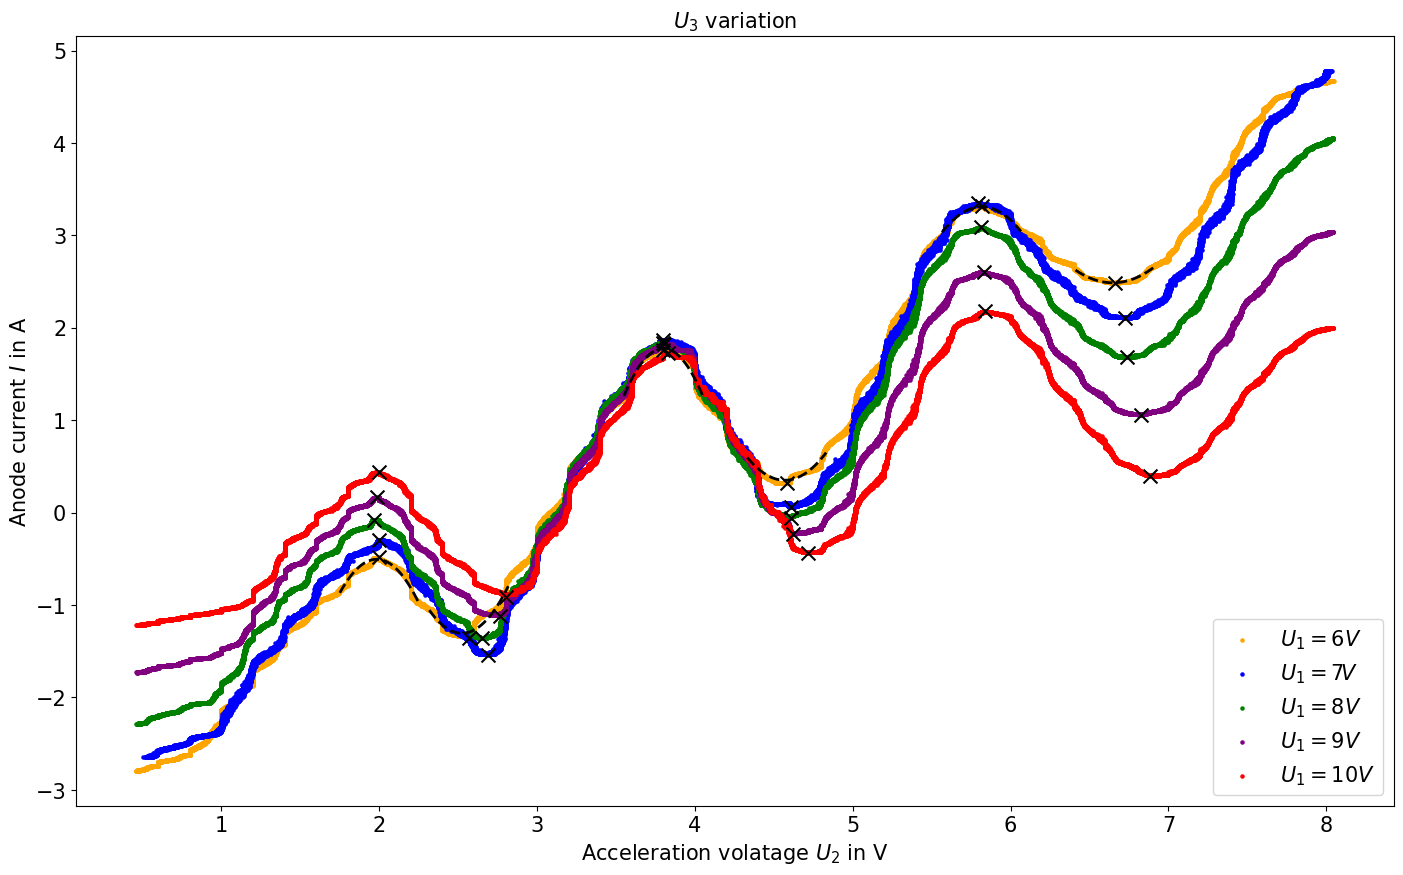

In [189]:
def parabel(x, a, d, e):
  return a*(x-d)**2 +e

def parabelm(x, a, d, e):
  return -a*(x-d)**2 +e

rangee = 0.25

plt.subplots(1,1,figsize=(17, 10));

x = data2[0]
y = data2[1]

plt.scatter(x, y, color='orange', s=5, zorder= 5, label = r'$U_1 = 6V$')
peaks, _ = find_peaks(y,  distance=10000)
peaks = peaks[(x[peaks] >= 1) & (x[peaks] <= 7.5)]
plt.scatter(x[peaks], y[peaks], color='black', s=100, zorder= 6, marker='x')

peakmax6 = peaks

peaks, _ = find_peaks(-y,  distance=10000)
peaks = peaks[(x[peaks] >= 1) & (x[peaks] <= 7.5)]
plt.scatter(x[peaks], y[peaks], color='black', s=100, zorder= 6, marker='x')


peakmin6 = peaks

indices = np.where((x >= x[peakmax6[0]]-rangee) & (x <= x[peakmax6[0]]+rangee))[0]
pars, stdevs, xfit, yfit = daten_fitten_chi(parabel, x[indices], y[indices], 10000, [1, 1, 1], x[peakmax6[0]]-rangee, x[peakmax6[0]]+rangee)
plt.plot(xfit, yfit, '--', color='black', zorder= 6, linewidth=2)

pars1 = pars
stdevs1 = stdevs

indices = np.where((x >= x[peakmin6[0]]-rangee) & (x <= x[peakmin6[0]]+rangee))[0]
pars, stdevs, xfit, yfit = daten_fitten_chi(parabel, x[indices], y[indices], 10000, [1, 1, 1], x[peakmin6[0]]-rangee ,x[peakmin6[0]]+rangee)
plt.plot(xfit, yfit, '--', color='black', zorder= 6, linewidth=2)

pars2 = pars
stdevs2 = stdevs

indices = np.where((x >= x[peakmax6[1]]-rangee) & (x <= x[peakmax6[1]]+rangee))[0]
pars, stdevs, xfit, yfit = daten_fitten_chi(parabel, x[indices], y[indices], 10000, [1, 1, 1], x[peakmax6[1]]-rangee,x[peakmax6[1]]+rangee)
plt.plot(xfit, yfit, '--', color='black', zorder= 6, linewidth=2)

pars3 = pars
stdevs3 = stdevs

indices = np.where((x >= x[peakmin6[1]]-rangee) & (x <= x[peakmin6[1]]+rangee))[0]
pars, stdevs, xfit, yfit = daten_fitten_chi(parabel, x[indices], y[indices], 10000, [1, 1, 1], x[peakmin6[1]]-rangee ,x[peakmin6[1]]+rangee)
plt.plot(xfit, yfit, '--', color='black', zorder= 6, linewidth=2)

pars4 = pars
stdevs4 = stdevs

indices = np.where((x >= x[peakmax6[2]]-rangee) & (x <= x[peakmax6[2]]+rangee))[0]
pars, stdevs, xfit, yfit = daten_fitten_chi(parabel, x[indices], y[indices], 10000, [1, 1, 1], x[peakmax6[2]]-rangee ,x[peakmax6[2]]+rangee)
plt.plot(xfit, yfit, '--', color='black', zorder= 6, linewidth=2)

pars5 = pars
stdevs5 = stdevs

indices = np.where((x >= x[peakmin6[2]]-rangee) & (x <= x[peakmin6[2]]+rangee))[0]
pars, stdevs, xfit, yfit = daten_fitten_chi(parabel, x[indices], y[indices], 10000, [1, 1, 1], x[peakmin6[2]]-rangee ,x[peakmin6[2]]+rangee)
plt.plot(xfit, yfit, '--', color='black', zorder= 6, linewidth=2)

pars6 = pars
stdevs6 = stdevs

rangee = 0.25
x = data2[2]
y = data2[3]

plt.scatter(x, y, color='blue', s=5, zorder= 5, label = r'$U_1 = 7V$')
peaks, _ = find_peaks(y,  distance=10000)
peaks = peaks[(x[peaks] >= 1) & (x[peaks] <= 7.5)]
plt.scatter(x[peaks], y[peaks], color='black', s=100, zorder= 6, marker='x')


peakmax7 = peaks

peaks, _ = find_peaks(-y,  distance=10000)
peaks = peaks[(x[peaks] >= 1) & (x[peaks] <= 7.5)]
plt.scatter(x[peaks], y[peaks], color='black', s=100, zorder= 6, marker='x')


peakmin7 = peaks

rangee = 0.4
x = data2[4]
y = data2[5]

plt.scatter(x, y, color='green', s=5, zorder= 5, label = r'$U_1 = 8V$')
peaks, _ = find_peaks(y,  distance=10000)
peaks = peaks[(x[peaks] >= 1) & (x[peaks] <= 7.5)]
plt.scatter(x[peaks], y[peaks], color='black', s=100, zorder= 6, marker='x')


peakmax8 = peaks

peaks, _ = find_peaks(-y,  distance=10000)
peaks = peaks[(x[peaks] >= 1) & (x[peaks] <= 7.5)]
plt.scatter(x[peaks], y[peaks], color='black', s=100, zorder= 6, marker='x')


peakmin8 = peaks



x = data2[6]
y = data2[7]

plt.scatter(x, y, color='purple', s=5, zorder= 5, label = r'$U_1 = 9V$')
peaks, _ = find_peaks(y,  distance=10000)
peaks = peaks[(x[peaks] >= 1) & (x[peaks] <= 7.5)]
plt.scatter(x[peaks], y[peaks], color='black', s=100, zorder= 6, marker='x')


peakmax9 = peaks

peaks, _ = find_peaks(-y,  distance=10000)
peaks = peaks[(x[peaks] >= 1) & (x[peaks] <= 7.5)]
plt.scatter(x[peaks], y[peaks], color='black', s=100, zorder= 6, marker='x')


peakmin9 = peaks



x = data2[8]
y = data2[9]

plt.scatter(x, y, color='red', s=5, zorder= 5, label = r'$U_1 = 10V$')
peaks, _ = find_peaks(y,  distance=10000)
peaks = peaks[(x[peaks] >= 1) & (x[peaks] <= 7.5)]
plt.scatter(x[peaks], y[peaks], color='black', s=100, zorder= 6, marker='x')


peakmax10 = peaks

peaks, _ = find_peaks(-y,  distance=10000)
peaks = peaks[(x[peaks] >= 1) & (x[peaks] <= 7.5)]
plt.scatter(x[peaks], y[peaks], color='black', s=100, zorder= 6, marker='x')


peakmin10 = peaks


#pars, stdevs, xfit, yfit = daten_fitten(exponential, x_array, y_array, 100, [200, -0.02], 0 ,310)
#plt.plot(xfit, yfit, '--', color='red', label = r'Exponential-Fit:$ y = (%.0f \pm %.0f) \cdot exp({(%.4f \pm %.4f) \frac{1}{ms} \cdot x})$'%(pars[0], stdevs[0], pars[1], stdevs[1]), zorder= 6, linewidth=3)

plt.xlabel(r'Acceleration volatage $U_2$ in V', fontsize=15)
plt.ylabel(r'Anode current $I$ in A', fontsize=15)
plt.title(r'$U_3$ variation', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Display the plot
plt.legend(loc = 'lower right', fontsize=15)
#plt.axis([0, 310, 0.1, 500]) #Achsenanpassung
plt.show()

In [190]:
print(ufloat(x[peakmax10[2]], fehlerd5))
print(ufloat(x[peakmax10[1]], fehlerd3))
print(ufloat(x[peakmax10[0]], fehlerd1))
print(ufloat(x[peakmin10[2]], fehlerd6))
print(ufloat(x[peakmin10[1]], fehlerd4))
print(ufloat(x[peakmin10[0]], fehlerd2))

5.83750+/-0.00027
3.8297+/-0.0004
2.00078+/-0.00029
6.88359+/-0.00030
4.7195+/-0.0004
2.8008+/-0.0006


In [191]:
fehlerd1 = stdevs1[1]
fehlerd2 = stdevs2[1]
fehlerd3 = stdevs3[1]
fehlerd4 = stdevs4[1]
fehlerd5 = stdevs5[1]
fehlerd6 = stdevs6[1]

fehlere1 = stdevs1[2]
fehlere2 = stdevs2[2]
fehlere3 = stdevs3[2]
fehlere4 = stdevs4[2]
fehlere5 = stdevs5[2]
fehlere6 = stdevs6[2]

x = data2[0]*10
y = data2[1]

maxabstand16 = ufloat(x[peakmax6[1]], fehlerd3)- ufloat(x[peakmax6[0]], fehlerd1)
maxabstand26 = ufloat(x[peakmax6[2]], fehlerd5) - ufloat(x[peakmax6[1]], fehlerd3)
print('Abstand MAX 6V:', maxabstand16, maxabstand26)
minabstand16 = ufloat(x[peakmin6[1]], fehlerd4) - ufloat(x[peakmin6[0]], fehlerd2)
minabstand26 = ufloat(x[peakmin6[2]],fehlerd6) - ufloat(x[peakmin6[1]],fehlerd4)
print('Abstand MIN 6V:', minabstand16, minabstand26)

x = data2[2]*10
y = data2[3]

maxabstand17 = ufloat(x[peakmax7[1]], fehlerd3)- ufloat(x[peakmax7[0]], fehlerd1)
maxabstand27 = ufloat(x[peakmax7[2]], fehlerd5) - ufloat(x[peakmax7[1]], fehlerd3)
print('Abstand MAX 7V:', maxabstand17, maxabstand27)
minabstand17 = ufloat(x[peakmin7[1]], fehlerd4) - ufloat(x[peakmin7[0]], fehlerd2)
minabstand27 = ufloat(x[peakmin7[2]],fehlerd6) - ufloat(x[peakmin7[1]],fehlerd4)
print('Abstand MIN 7V:', minabstand17, minabstand27)

x = data2[4]*10
y = data2[5]

maxabstand18 = ufloat(x[peakmax8[1]], fehlerd3)- ufloat(x[peakmax8[0]], fehlerd1)
maxabstand28 = ufloat(x[peakmax8[2]], fehlerd5) - ufloat(x[peakmax8[1]], fehlerd3)
print('Abstand MAX 8V:', maxabstand18, maxabstand28)
minabstand18 = ufloat(x[peakmin8[1]], fehlerd4) - ufloat(x[peakmin8[0]], fehlerd2)
minabstand28 = ufloat(x[peakmin8[2]],fehlerd6) - ufloat(x[peakmin8[1]],fehlerd4)
print('Abstand MIN 8V:', minabstand18, minabstand28)

x = data2[6]*10
y = data2[7]

maxabstand19 = ufloat(x[peakmax9[1]], fehlerd3)- ufloat(x[peakmax9[0]], fehlerd1)
maxabstand29 = ufloat(x[peakmax9[2]], fehlerd5) - ufloat(x[peakmax9[1]], fehlerd3)
print('Abstand MAX 9V:', maxabstand19, maxabstand29)
minabstand19 = ufloat(x[peakmin9[1]], fehlerd4) - ufloat(x[peakmin9[0]], fehlerd2)
minabstand29 = ufloat(x[peakmin9[2]],fehlerd6) - ufloat(x[peakmin9[1]],fehlerd4)
print('Abstand MIN 9V:', minabstand19, minabstand29)

x = data2[8]*10
y = data2[9]

maxabstand110 = ufloat(x[peakmax10[1]], fehlerd3)- ufloat(x[peakmax10[0]], fehlerd1)
maxabstand210 = ufloat(x[peakmax10[2]], fehlerd5) - ufloat(x[peakmax10[1]], fehlerd3)
print('Abstand MAX 10V:', maxabstand110, maxabstand210)
minabstand110 = ufloat(x[peakmin10[1]], fehlerd4) - ufloat(x[peakmin10[0]], fehlerd2)
minabstand210 = ufloat(x[peakmin10[2]],fehlerd6) - ufloat(x[peakmin10[1]],fehlerd4)
print('Abstand MIN 10V:', minabstand110, minabstand210)

Abstand MAX 6V: 18.0000+/-0.0005 20.1485+/-0.0005
Abstand MIN 6V: 20.1328+/-0.0008 20.7969+/-0.0005
Abstand MAX 7V: 18.0234+/-0.0005 19.9609+/-0.0005
Abstand MIN 7V: 19.2032+/-0.0008 21.1250+/-0.0005
Abstand MAX 8V: 18.3125+/-0.0005 20.1250+/-0.0005
Abstand MIN 8V: 19.5859+/-0.0008 21.3047+/-0.0005
Abstand MAX 9V: 18.1875+/-0.0005 20.2735+/-0.0005
Abstand MIN 9V: 18.5703+/-0.0008 22.0547+/-0.0005
Abstand MAX 10V: 18.2891+/-0.0005 20.0781+/-0.0005
Abstand MIN 10V: 19.1875+/-0.0008 21.6406+/-0.0005


Fitparameter
[ 1.9547  15.23045]
zugehörige Uncertainty
[0.08256402 0.17021008]
Chi-Quadrat:
9.999999999999996
Reduziertes Chi-Quadrat:
1.2499999999999996
Fitparameter
[ 2.04844 15.23906]
zugehörige Uncertainty
[0.33593612 0.85647243]
Chi-Quadrat:
9.999999999999998
Reduziertes Chi-Quadrat:
1.2499999999999998


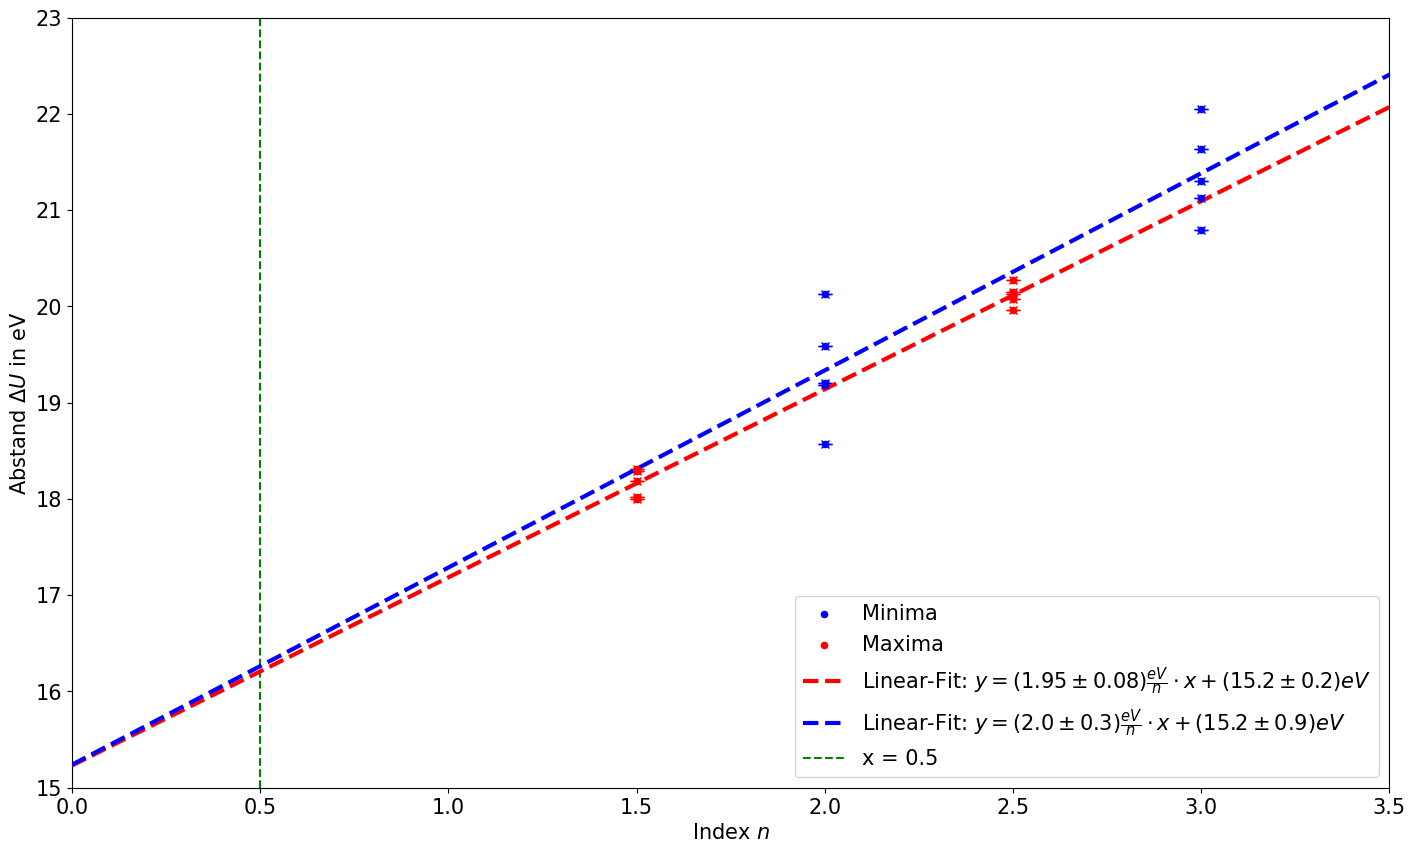

In [195]:
y_max = np.array([maxabstand16, maxabstand26, maxabstand17, maxabstand27, maxabstand18, maxabstand28,maxabstand19, maxabstand29,maxabstand110, maxabstand210])
x_max = np.array([1.5, 2.5, 1.5, 2.5, 1.5, 2.5, 1.5, 2.5, 1.5, 2.5])

y_min = np.array([ minabstand16, minabstand17, minabstand18, minabstand19, minabstand110, minabstand26, minabstand27, minabstand28, minabstand29, minabstand210])
x_min = np.array([ 2, 2, 2, 2, 2, 3, 3, 3, 3, 3])

# Extrahieren der nominal values und Fehler
y_max_values = [i.nominal_value for i in y_max]
y_max_errors = [i.std_dev for i in y_max]

y_min_values = [i.nominal_value for i in y_min]
y_min_errors = [i.std_dev for i in y_min]

# Plot erstellen
plt.subplots(1, 1, figsize=(17, 10))

plt.scatter(x_min, y_min_values, color='blue', s=20, zorder=5, label=r'Minima')
plt.scatter(x_max, y_max_values, color='red', s=20, zorder=5, label=r'Maxima')

# Fehlerbalken hinzufügen
plt.errorbar(x_min, y_min_values, yerr=y_min_errors, fmt='x', color='blue', capsize=5)
plt.errorbar(x_max, y_max_values, yerr=y_max_errors, fmt='x', color='red', capsize=5)



pars, stdevs, xfit, yfit = daten_fitten_chi(line, x_max, y_max_values, 100, [1, 1], 0 ,45)
plt.plot(xfit, yfit, '--', color='red', label = r'Linear-Fit: $ y = (%.2f \pm %.2f) \frac{eV}{n} \cdot x + (%.1f \pm %.1f) eV$'%(pars[0], stdevs[0], pars[1], stdevs[1]), zorder= 4, linewidth=3)
pars, stdevs, xfit, yfit = daten_fitten_chi(line, x_min, y_min_values, 100, [1, 1], 0 ,45)
plt.plot(xfit, yfit, '--', color='blue', label = r'Linear-Fit: $ y = (%.1f \pm %.1f) \frac{eV}{n} \cdot x + (%.1f \pm %.1f) eV$'%(pars[0], stdevs[0], pars[1], stdevs[1]), zorder= 4, linewidth=3)
plt.axvline(x=0.5, color='green', linestyle='--', label='x = 0.5')
plt.xlabel(r'Index $n$', fontsize=15)
plt.ylabel(r'Abstand $\Delta U$ in eV', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.axis([0, 3.5, 15, 23]) #Achsenanpassung
plt.legend(loc = 'lower right', fontsize=15)
plt.show()


In [196]:
def intersection_with_uncertainty(a, b, x=0.5):
    """
    Berechnet den Schnittpunkt einer Geraden y = ax + b mit der senkrechten Linie x = 0.5
    unter Berücksichtigung der Unsicherheiten von a und b.

    Parameter:
    a (ufloat): Steigung der Geraden mit Unsicherheit
    b (ufloat): Achsenabschnitt der Geraden mit Unsicherheit
    x (float): Die x-Koordinate der senkrechten Linie (Standard: 0.5)

    Rückgabe:
    y (ufloat): Die y-Koordinate des Schnittpunkts mit Unsicherheit
    """
    y = a * x + b
    return y


# Beispielwerte
a = ufloat(pars[0], stdevs[0])  # Steigung mit Unsicherheit
b = ufloat(pars[1], stdevs[1])  # Achsenabschnitt mit Unsicherheit

# Berechnung des Schnittpunkts
y_intersection = intersection_with_uncertainty(a, b)

print(f"Schnittpunkt: y = {y_intersection}")

Schnittpunkt: y = 16.3+/-0.9


In [197]:
L = 5 #mm
print(a)
print(y_intersection)
lamda = L/(2*y_intersection) * a
print(lamda)

2.05+/-0.34
16.3+/-0.9
0.31+/-0.05


In [198]:
data3 = np.zeros((10, 47500))
for i in range(1,3):
  file_path = f"A3_{i}.CSV"
  numbers_array= read_numbers_from_file(file_path)
  numbers_array = np.array(numbers_array)
  data3[i-1] = numbers_array

Fitparameter
[ 0.00421653 -0.05824138  0.21780292  0.61910841 -2.47233042]
zugehörige Uncertainty
[0.00019507 0.00334311 0.0194347  0.04385294 0.03092902]
Chi-Quadrat:
47500.0
Reduziertes Chi-Quadrat:
1.0001052742393937


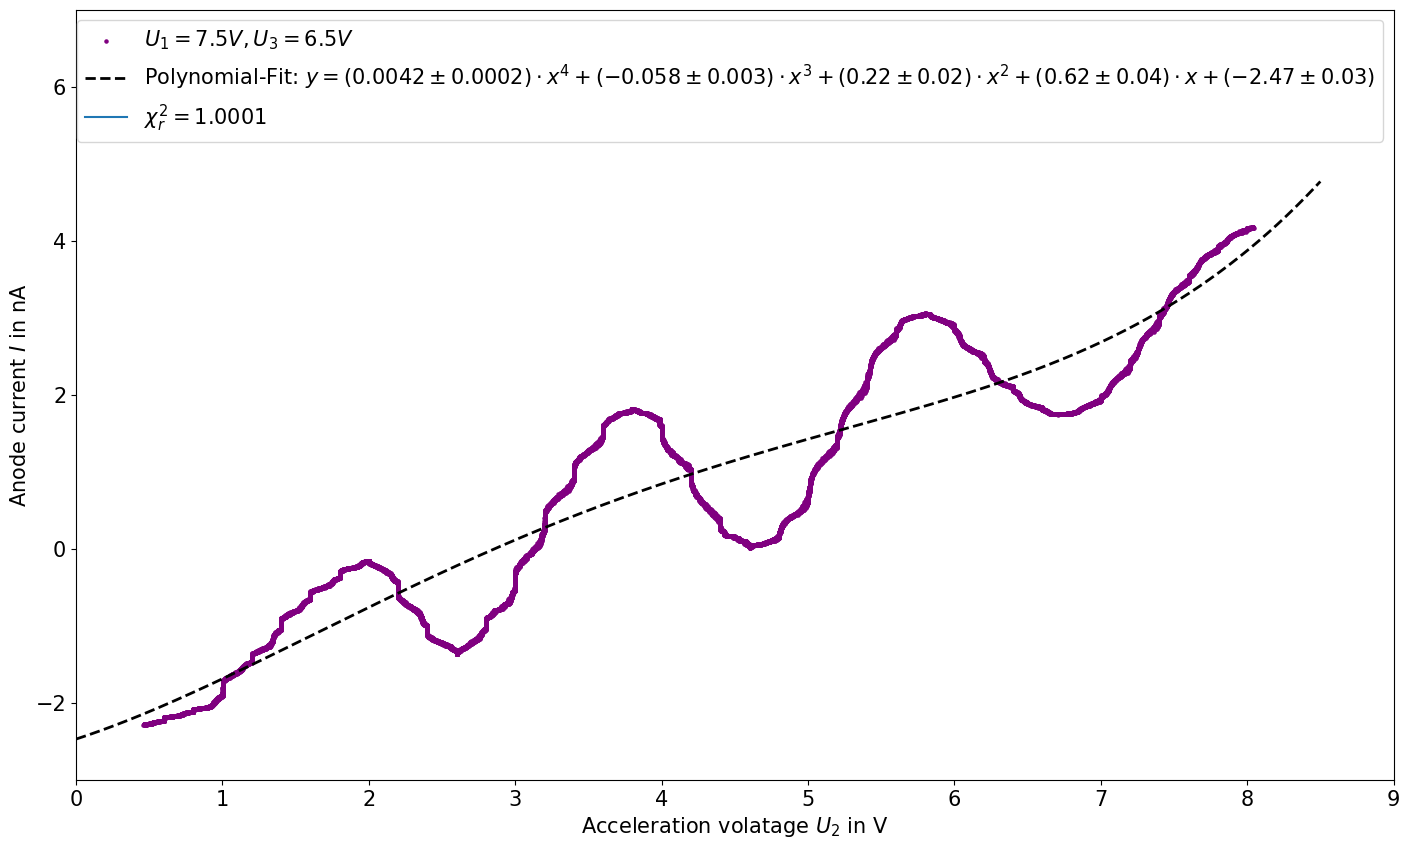

In [199]:
def poly(x, a, b, c, d, e):
  return a*x**4 + b*x**3 + c*x**2 + d*x + e

plt.subplots(1,1,figsize=(17, 10));

x = data3[0]
y = data3[1]

plt.scatter(x, y, color='purple', s=5, zorder= 5, label = r'$U_1 = 7.5V, U_3 = 6.5V$')

pars, stdevs, xfit, yfit = daten_fitten_chi(poly, x, y, 1000, [1, 1, 1, 1, 1], 0, 8.5)
plt.plot(xfit, yfit, '--', color='black', zorder= 6, linewidth=2, label = r'Polynomial-Fit: $ y = (%.4f \pm %.4f) \cdot x^4 + (%.3f \pm %.3f) \cdot x^3 + (%.2f \pm %.2f) \cdot x^2 + (%.2f \pm %.2f) \cdot x + (%.2f \pm %.2f)$'%(pars[0], stdevs[0], pars[1], stdevs[1], pars[2], stdevs[2], pars[3], stdevs[3], pars[4], stdevs[4]))
plt.plot(-5,0, label = r'$\chi^2_r = 1.0001$')
plt.xlabel(r'Acceleration volatage $U_2$ in V', fontsize=15)
plt.ylabel(r'Anode current $I$ in nA', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Display the plot
plt.legend(loc = 'upper right', fontsize=15)
plt.axis([0, 9, -3, 7]) #Achsenanpassung
plt.show()

Fitparameter
[ 1.77664217e-10 -5.91006133e-10]
zugehörige Uncertainty
[0.00042158 0.0016763 ]
Chi-Quadrat:
47500.00000000001
Reduziertes Chi-Quadrat:
1.0000421070360859


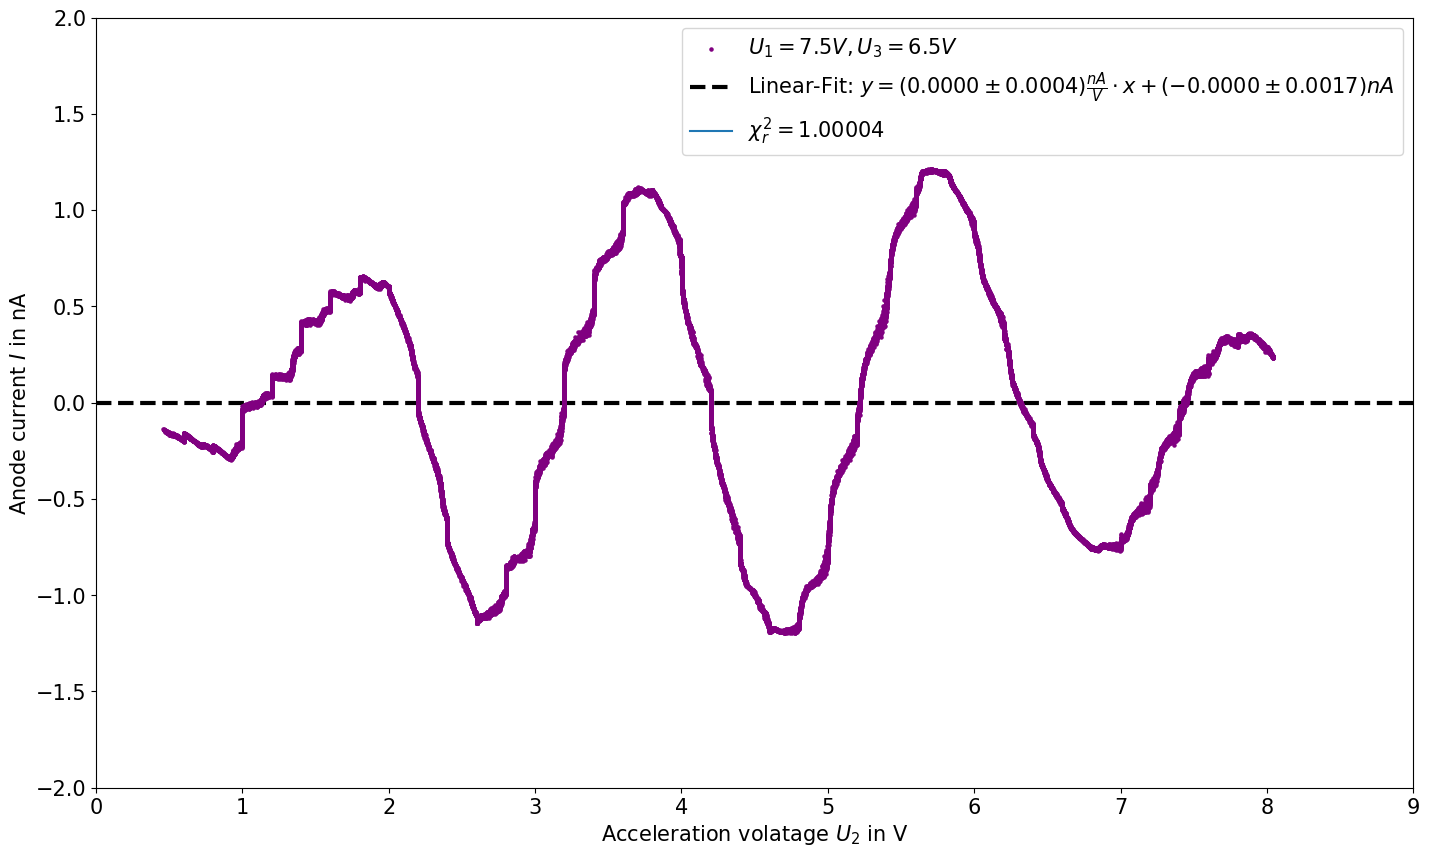

In [200]:
plt.subplots(1,1,figsize=(17, 10));

x = data3[0]
y = data3[1]-poly(x, pars[0], pars[1], pars[2], pars[3], pars[4])

plt.scatter(x, y, color='purple', s=5, zorder= 5, label = r'$U_1 = 7.5V, U_3 = 6.5V$')

pars, stdevs, xfit, yfit = daten_fitten_chi(line, x, y, 100, [1, 1], 0 ,9)
plt.plot(xfit, yfit, '--', color='black', label = r'Linear-Fit: $ y = (%.4f \pm %.4f) \frac{nA}{V} \cdot x + (%.4f \pm %.4f) nA$'%(pars[0], stdevs[0], pars[1], stdevs[1]), zorder= 4, linewidth=3)

plt.plot(-5,0, label = r'$\chi^2_r = 1.00004$')
plt.xlabel(r'Acceleration volatage $U_2$ in V', fontsize=15)
plt.ylabel(r'Anode current $I$ in nA', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Display the plot
plt.legend(loc = 'upper right', fontsize=15)
plt.axis([0, 9, -2, 2]) #Achsenanpassung
plt.show()